Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-236.679,-246.311,3.69244e-75
2,140.151,4.0,-233.657,-243.274,7.69366e-74
3,140.302,4.0,-230.663,-240.266,1.55808e-72
4,140.452,4.0,-227.697,-237.286,3.0668e-71
5,140.603,4.0,-224.76,-234.335,5.86702e-70
6,140.754,4.0,-221.851,-231.412,1.09091e-68
7,140.905,4.0,-218.971,-228.518,1.97149e-67
8,141.055,4.0,-216.119,-225.652,3.46291e-66
9,141.206,4.0,-213.295,-222.814,5.91187e-65


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,151.759,6.97487,-70.4258,-79.1133,0.0151475
2,156.432,8.50251,-67.4593,-75.8675,0.389031
3,153.869,6.41206,-67.7741,-76.3286,0.245308
4,155.226,6.81407,-66.674,-75.149,0.797978
5,154.925,6.25126,-66.976,-75.4683,0.579892
6,155.377,6.01005,-66.9255,-75.3919,0.625895
7,155.075,6.65327,-66.7471,-75.2307,0.735381
8,154.322,7.21608,-67.2121,-75.7397,0.442067
9,155.98,6.73367,-66.5049,-74.9377,0.985799


### Snippet 4.23

Density of sigma

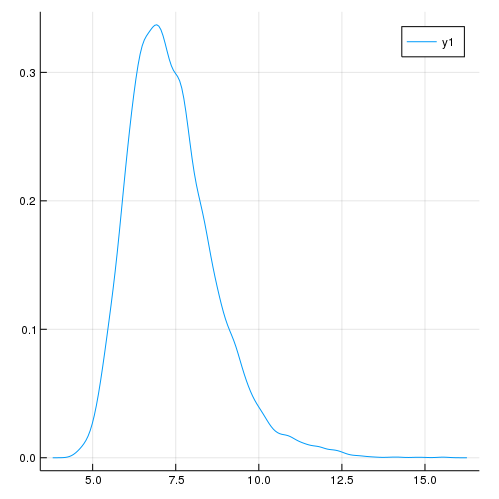

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*